# Project Title

Comprehensive Data-Driven Analysis of Indian Automotive Sales Market (2020-2025)

# Domain
Automotive

# Objective

1. To perform exploratory data analysis (EDA) to uncover patterns, trends, and insights from the Indian automotive sales dataset (2020–2025).

2. To preprocess and clean the dataset by addressing missing values, inconsistencies, and outliers to ensure data quality.

3. To create effective visualizations that communicate key findings and support data-driven decision-making.

4. To generate actionable business insights and recommendations to support strategic planning and marketing in the automotive sector.

# Outcome

The outcome of this project is a comprehensive understanding of the Indian automotive sales market from 2020 to 2025 through detailed data exploration and analysis. It results in a cleaned and reliable dataset, insightful visualizations that highlight sales trends, brand and model performance, and regional variations. The project delivers actionable business insights and strategic recommendations to manufacturers and dealers for optimizing inventory, marketing efforts, and pricing strategies, ultimately driving better decision-making and improved market performance.

#Dataset Information

Source: Open Data Portals

Year / Timeline: Data collected covering the period from 2020 to 2025

Dataset Description:
This dataset provides a comprehensive view of the Indian car sales market, containing detailed records of car listings across various brands, models, and price points. Each record includes attributes such as brand, model, category, fuel type, transmission, manufacturing year, units sold, location, dealer type, and sale date. It enables detailed market trend analysis, customer preference evaluation, and regional sales distribution studies to support business insights and decision making.

#Type of Analysis

Descriptive Analysis — This involves summarizing and exploring the Indian car sales dataset to understand patterns, trends, and key statistics such as sales volumes, popular brands and models, price distributions, and regional sales variations. It helps provide a clear overview of what has happened in the market using visualization and summary statistics.

# Stages for DA Project

## Stage 1 – Problem Definition and Dataset Selection

Define the business problem and expected outcome

Choose dataset and explain its source, size, and features

Import libraries, load dataset

Dataset description (rows, columns, features)

Initial EDA (head, info, describe, shape, null checks)

##Problem Definition and Dataset Selection
The business problem is that car manufacturers and dealers lack clear insights into sales trends, customer preferences, and regional performance in the Indian automotive market, causing inefficient inventory management and marketing strategies. This project aims to analyze sales data from 2020 to 2025 to uncover key patterns and provide actionable recommendations that improve decision-making, boost sales, and optimize business outcomes.



In [187]:
import pandas as pd
import numpy as np
# Import required libraries

import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file from the internet
url = "https://raw.githubusercontent.com/muthutony2110/sample/refs/heads/main/indian_car_sales2.csv"
df = pd.read_csv(url)


In [188]:
# Check how many rows and columns our dataset has
print("Number of rows and columns:", df.shape)


Number of rows and columns: (4040, 11)


In [189]:
# Show the names of columns (data features)
print("Columns in dataset:", list(df.columns))


Columns in dataset: ['SaleID', 'SaleDate', 'Brand', 'Model', 'Price', 'EngineCC', 'FuelType', 'Transmission', 'BuyerGender', 'City', 'UnitsSold']


In [190]:
# Look at first 5 rows to understand what the data looks like
print(df.head())


      SaleID    SaleDate          Brand   Model    Price EngineCC  FuelType  \
0  SAL103626  16-02-2022  Maruti Suzuki  Ertiga   301000     1198    Diesle   
1  SAL103310  21-09-2022            Kia   Sonet  2029000     1498       CNG   
2  SAL101142  24-07-2021         Toyota  Glanza  2598000     1198   Petroll   
3  SAL101767  17-02-2024           Tata    Nano   966000     1198    Diesle   
4  SAL102645  28-06-2024          Skoda   Rapid  1592000      800  Electric   

  Transmission BuyerGender       City UnitsSold  
0          AMT        Male  Ahmedabad         5  
1       Manual        Male    Chennai         1  
2       Manual        Male    Kolkata         1  
3       Manual      Female  Ahmedabad         4  
4       Manual      Female      Delhi         1  


In [191]:
# Check information about column data types and missing values
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4040 entries, 0 to 4039
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   SaleID        3998 non-null   object
 1   SaleDate      4000 non-null   object
 2   Brand         3996 non-null   object
 3   Model         3998 non-null   object
 4   Price         3973 non-null   object
 5   EngineCC      3994 non-null   object
 6   FuelType      3999 non-null   object
 7   Transmission  3997 non-null   object
 8   BuyerGender   4000 non-null   object
 9   City          3997 non-null   object
 10  UnitsSold     3997 non-null   object
dtypes: object(11)
memory usage: 347.3+ KB
None


In [192]:
# See some basic stats on numeric data like sales
print(df.describe())


           SaleID  SaleDate   Brand Model  Price EngineCC FuelType  \
count        3998      4000    3996  3998   3973     3994     3999   
unique       3957      1785      17    57   1968       21        9   
top     SAL103073  May 2023  Toyota  WR-V  -5000     1998  Petroll   
freq            2        40     431   124     24      454     2162   

       Transmission BuyerGender       City UnitsSold  
count          3997        4000       3997      3997  
unique            8           7         14        11  
top          Manual        Male  Ahmedabad         2  
freq           2560        2767        417       695  


In [193]:
# See if we have any missing values in the dataset
print(df.isnull().sum())


SaleID          42
SaleDate        40
Brand           44
Model           42
Price           67
EngineCC        46
FuelType        41
Transmission    43
BuyerGender     40
City            43
UnitsSold       43
dtype: int64


## Stage 2 – Data Cleaning and Pre-processing

Handle missing values (impute or drop)

Handle duplicates

Treat outliers if required

Check skewness and apply transformations

Convert data types if needed

Feature transformations (date parts, derived fields if required for analysis)

In [194]:
# Handle missing values in each column
for col in df.columns:
    missing_count = df[col].isnull().sum()
    if missing_count > 0:
        print(f"Handling missing values in column: {col}")
        if df[col].dtype in [np.float64, np.int64]:
            # For numeric columns, fill missing values with median
            median_val = df[col].median()
            df[col].fillna(median_val, inplace=True)
            print(f"Filled {missing_count} missing numeric values with median: {median_val}")
        else:
            # For non-numeric columns, drop rows with missing values
            df.dropna(subset=[col], inplace=True)
            print(f"Dropped rows with missing values in {col}")
print("Missing values after handling:")
print(df.isnull().sum())


Handling missing values in column: SaleID
Dropped rows with missing values in SaleID
Handling missing values in column: SaleDate
Dropped rows with missing values in SaleDate
Handling missing values in column: Brand
Dropped rows with missing values in Brand
Handling missing values in column: Model
Dropped rows with missing values in Model
Handling missing values in column: Price
Dropped rows with missing values in Price
Handling missing values in column: EngineCC
Dropped rows with missing values in EngineCC
Handling missing values in column: FuelType
Dropped rows with missing values in FuelType
Handling missing values in column: Transmission
Dropped rows with missing values in Transmission
Handling missing values in column: BuyerGender
Dropped rows with missing values in BuyerGender
Handling missing values in column: City
Dropped rows with missing values in City
Handling missing values in column: UnitsSold
Dropped rows with missing values in UnitsSold
Missing values after handling:
Sale

In [195]:
# Check for duplicate rows
duplicates_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates_count}")

# Drop duplicate rows if any
df.drop_duplicates(inplace=True)
print(f"Shape after dropping duplicates: {df.shape}")


Number of duplicate rows: 32
Shape after dropping duplicates: (3544, 11)


In [196]:
# Treat outliers in numeric columns with IQR method
numeric_cols = df.select_dtypes(include=[np.number]).columns
print("Numeric columns:", list(numeric_cols))

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    initial_len = len(df)
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    filtered_len = len(df)

    print(f"Removed {initial_len - filtered_len} outliers from {col}")

print(f"Shape after outlier treatment: {df.shape}")


Numeric columns: []
Shape after outlier treatment: (3544, 11)


In [197]:
# Check skewness and apply log transform to reduce skew in numeric columns
skewed_cols = df[numeric_cols].apply(lambda x: skew(x.dropna()))
print("Skewness in numeric columns:")
print(skewed_cols)

for col, skewness in skewed_cols.items():
    if abs(skewness) > 0.75:
        print(f"Applying log transformation to reduce skewness in column: {col}")
        df[col] = np.log1p(df[col])  # log(1 + x) to avoid log(0)


Skewness in numeric columns:
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 104, 105, 106, 107, 108, 109, ...]

[3544 rows x 0 columns]


In [198]:
# Convert columns containing 'date' or 'year' in their name to datetime if possible
for col in df.columns:
    if 'date' in col.lower() or 'year' in col.lower():
        try:
            df[col] = pd.to_datetime(df[col], dayfirst=True)
            print(f"Converted {col} to datetime")
        except Exception as e:
            print(f"Could not convert {col} to datetime: {e}")

print(df.dtypes)


Could not convert SaleDate to datetime: time data "May 2023" doesn't match format "%d-%m-%Y", at position 141. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.
SaleID          object
SaleDate        object
Brand           object
Model           object
Price           object
EngineCC        object
FuelType        object
Transmission    object
BuyerGender     object
City            object
UnitsSold       object
dtype: object


In [199]:
# Extract year, month, day, weekday from datetime columns
datetime_cols = df.select_dtypes(include=['datetime64[ns]']).columns
print("Datetime columns for extracting features:", list(datetime_cols))

for col in datetime_cols:
    df[col + '_year'] = df[col].dt.year
    df[col + '_month'] = df[col].dt.month
    df[col + '_day'] = df[col].dt.day
    df[col + '_weekday'] = df[col].dt.weekday

print(df.head())


Datetime columns for extracting features: []
      SaleID    SaleDate          Brand   Model    Price EngineCC  FuelType  \
0  SAL103626  16-02-2022  Maruti Suzuki  Ertiga   301000     1198    Diesle   
1  SAL103310  21-09-2022            Kia   Sonet  2029000     1498       CNG   
2  SAL101142  24-07-2021         Toyota  Glanza  2598000     1198   Petroll   
3  SAL101767  17-02-2024           Tata    Nano   966000     1198    Diesle   
4  SAL102645  28-06-2024          Skoda   Rapid  1592000      800  Electric   

  Transmission BuyerGender       City UnitsSold  
0          AMT        Male  Ahmedabad         5  
1       Manual        Male    Chennai         1  
2       Manual        Male    Kolkata         1  
3       Manual      Female  Ahmedabad         4  
4       Manual      Female      Delhi         1  


In [200]:
# Convert 'SaleDate' to datetime format (day first)
df['SaleDate'] = pd.to_datetime(df['SaleDate'], dayfirst=True, errors='coerce')

# Convert important columns to numeric (Price, EngineCC, UnitsSold)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['EngineCC'] = pd.to_numeric(df['EngineCC'], errors='coerce')
df['UnitsSold'] = pd.to_numeric(df['UnitsSold'], errors='coerce')

# Drop rows with missing values in these critical columns
df = df.dropna(subset=['Price', 'EngineCC', 'UnitsSold', 'SaleDate'])

print("Data types after conversion:")
print(df.dtypes)


Data types after conversion:
SaleID                  object
SaleDate        datetime64[ns]
Brand                   object
Model                   object
Price                  float64
EngineCC               float64
FuelType                object
Transmission            object
BuyerGender             object
City                    object
UnitsSold              float64
dtype: object


In [201]:
#this features are only fore removing unwanted patterns from my data

# Convert UnitsSold to numeric, coerce errors to NaN
df['UnitsSold'] = pd.to_numeric(df['UnitsSold'], errors='coerce')
# brand name correction
df['Brand'] = df['Brand'].replace({
    '@Honda': 'Honda',
    'Hyun dai': 'Hyundai'
})
#city name correction
df['City'] = df['City'].replace({
    'Bengaluru!!': 'Bengaluru'
})

# Replace invalid FuelType entries (like '??', empty strings) with NaN before dropping
df['FuelType'] = df['FuelType'].replace(['??', '', None], pd.NA)

# Remove rows with missing FuelType or UnitsSold
df = df.dropna(subset=['FuelType', 'UnitsSold'])

# Clean FuelType as before, with capitalization and trimming
df['FuelType'] = df['FuelType'].apply(lambda x: str(x).capitalize().strip())

# Correct common misspellings and variations
corrections = {
    'Petroll': 'Petrol',
    'Diesle': 'Diesel',
    'Petrol': 'Petrol',
    'Diesel': 'Diesel',
    'Cng': 'CNG',
    'Electric': 'Electric',
    'Hybrid-electric': 'Hybrid-Electric',
    'Hybrid': 'Hybrid'
}
df['FuelType'] = df['FuelType'].map(corrections).fillna(df['FuelType'])

# Then do grouping and summing
fueltype_sales_cleaned = df.groupby('FuelType')['UnitsSold'].sum().sort_values(ascending=False)
print(fueltype_sales_cleaned)


FuelType
Petrol            61,260
Diesel            21,013
Hybrid            12,893
CNG                6,872
Electric             620
Hybrid-Electric        8
Name: UnitsSold, dtype: float64


In [202]:
# Clean Transmission column
df['Transmission'] = df['Transmission'].astype(str).str.strip().str.capitalize()

# Define valid transmission types
valid_transmissions = ['Manual', 'Automatic', 'Amt', 'Cvt', 'Hybrid']  # add others if valid

# Replace known variations
corrections = {
    'Auto': 'Automatic',
    'manual': 'Manual',
    'Amt': 'Automatic',
    'cvt': 'Cvt'
}
df['Transmission'] = df['Transmission'].map(corrections).fillna(df['Transmission'])

# Keep only valid transmission types
df = df[df['Transmission'].isin(valid_transmissions)]

# Now aggregate units sold by Transmission for clean chart
transmission_sales = df.groupby('Transmission')['UnitsSold'].sum().reset_index()


In [203]:
df['BuyerGender'] = df['BuyerGender'].astype(str).str.strip().str.capitalize()
df['BuyerGender'] = df['BuyerGender'].replace({'M': 'Male', 'F': 'Female', '??': np.nan, '###': np.nan, '': np.nan})
df = df[df['BuyerGender'].isin(['Male', 'Female'])]


In [204]:
removal_symbols = {'###', '??', '', 'nan', None}

def clean_obj_column(col):
    col = col.astype(str).str.strip()
    col = col.replace(list(removal_symbols), np.nan)
    return col

for col in df.columns:
    if df[col].dtype == object:
        df[col] = clean_obj_column(df[col])

# For numeric columns, coerce errors to NaN to remove invalid strings if any
numeric_cols = df.select_dtypes(include=['number']).columns
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop any rows that have NaNs after cleaning/conversion (strict cleaning)
df = df.dropna(how='any')


## **Derived fields for analysis**

In [205]:
#its used for get a exact price value decimals
pd.options.display.float_format = '{:,.0f}'.format


In [206]:
# Revenue = Price * Units sold
df['Revenue'] = df['Price'] * df['UnitsSold']

# Show sample revenue values
print(df[['Model', 'Price', 'UnitsSold', 'Revenue']].head())


    Model     Price  UnitsSold   Revenue
0  Ertiga   301,000          5 1,505,000
1   Sonet 2,029,000          1 2,029,000
2  Glanza 2,598,000          1 2,598,000
3    Nano   966,000          4 3,864,000
4   Rapid 1,592,000          1 1,592,000


In [207]:
# Sum UnitsSold by Model and get the one with maximum sales
most_sold_model = df.groupby('Model')['UnitsSold'].sum().idxmax()
most_sold_units = df.groupby('Model')['UnitsSold'].sum().max()

print(f"Most sold car model overall is '{most_sold_model}' with {most_sold_units} units sold.")


Most sold car model overall is 'XUV300' with 11212.0 units sold.


In [208]:
# Sum revenue by Model, sorted high to low
total_revenue_by_model = df.groupby('Model')['Revenue'].sum().sort_values(ascending=False)

print("Top 5 models by total revenue:")
print(total_revenue_by_model.head())


Top 5 models by total revenue:
Model
Superb   16,497,160,000
EV6      13,489,414,000
Innova   13,286,094,000
XUV300   12,657,211,000
Kushaq   12,031,055,000
Name: Revenue, dtype: float64


In [209]:
# Extract year from SaleDate
df['SaleYear'] = df['SaleDate'].dt.year

# Group by year and model, sum units sold
yearly_sales = df.groupby(['SaleYear', 'Model'])['UnitsSold'].sum().unstack(fill_value=0)

print("Yearly units sold per model (showing first 5 years):")
print(yearly_sales.head())


Yearly units sold per model (showing first 5 years):
Model     Alto  Altroz  Amaze  Astor  Baleno  Bolero  Carens  Celerio  City  \
SaleYear                                                                      
2020        24      45     43     40      24      48      47       15    56   
2021        24      43     44     37      39      67      49       39    61   
2022        38      29     79     62      34      39      32       19    43   
2023        26      36     42     47       4      13      77       26    52   
2024        39      26     40     39      31   5,051   1,049       31    48   

Model     Creta  ...  XUV700  ZS EV  altroz  amaze  i10  i20  innova  kwid  \
SaleYear         ...                                                         
2020         21  ...      53     60       0      0   29   43       0     0   
2021      5,060  ...      54     39       0      0   38   41       0     0   
2022         27  ...      32     79       0      0   50   36       0     3   
202

In [210]:
# Sum total units sold grouped by FuelType
fuel_type_sales = df.groupby('FuelType')['UnitsSold'].sum().sort_values(ascending=False)

print("Total units sold by fuel type:")
print(fuel_type_sales)


Total units sold by fuel type:
FuelType
Petrol            61,214
Diesel            20,990
Hybrid            12,885
CNG                6,872
Electric             620
Hybrid-Electric        8
Name: UnitsSold, dtype: float64


In [211]:
# Average EngineCC by FuelType
avg_enginecc_fuel = df.groupby('FuelType')['EngineCC'].mean().sort_values(ascending=False)

print("Average engine capacity by fuel type:")
print(avg_enginecc_fuel)


Average engine capacity by fuel type:
FuelType
CNG               1,574
Petrol            1,547
Diesel            1,533
Electric          1,503
Hybrid            1,497
Hybrid-Electric   1,267
Name: EngineCC, dtype: float64


In [212]:
# Sum revenue by sale year
total_revenue_by_year = df.groupby('SaleYear')['Revenue'].sum()

print("Total revenue by year:")
print(total_revenue_by_year)


Total revenue by year:
SaleYear
2020   28,504,426,985
2021   14,997,534,986
2022   33,460,756,987
2023   10,592,989,986
2024   25,975,790,996
2025   31,662,761,996
Name: Revenue, dtype: float64


In [213]:
print(df.head(20))

       SaleID   SaleDate          Brand     Model     Price  EngineCC  \
0   SAL103626 2022-02-16  Maruti Suzuki    Ertiga   301,000     1,198   
1   SAL103310 2022-09-21            Kia     Sonet 2,029,000     1,498   
2   SAL101142 2021-07-24         Toyota    Glanza 2,598,000     1,198   
3   SAL101767 2024-02-17           Tata      Nano   966,000     1,198   
4   SAL102645 2024-06-28          Skoda     Rapid 1,592,000       800   
5   SAL103756 2020-07-01        Hyundai     Verna   622,000     1,197   
6   SAL103087 2020-02-12            Kia     Sonet   826,000     1,998   
8   SAL103852 2024-12-28       Mahindra      Thar 1,803,000       800   
9   SAL100602 2021-08-02          Skoda    Kushaq 1,189,000     1,497   
10  SAL101533 2020-08-07         Toyota  Fortuner 1,463,000     1,498   
11  SAL101707 2022-06-22        Renault    Triber   494,000       999   
12  SAL100250 2020-03-11       Mahindra    Bolero 1,230,000     2,500   
13  SAL103216 2021-02-27        Renault     Kiger  

In [214]:
from google.colab import files

# Save df as CSV
df.to_csv("my_data.csv", index=False)

# Download the file
files.download("my_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Stage 3 – EDA and Visualizations

**Interpretation:**

- Feature used: "UnitsSold" (how many cars were sold).
- This chart shows how many cars sold fall into different quantity ranges.
- High bars mean lots of cars sold around that number.
- The shape tells if most cars sold similar amounts or if sales numbers vary a lot.
- If the chart stretches more to the right, it means some cars sold a lot more than most.

**Why it matters:**

Knowing sales patterns helps businesses plan how many cars to make or stock. It also shows which models sell well or not.


In [215]:
pip install pandas matplotlib seaborn numpy

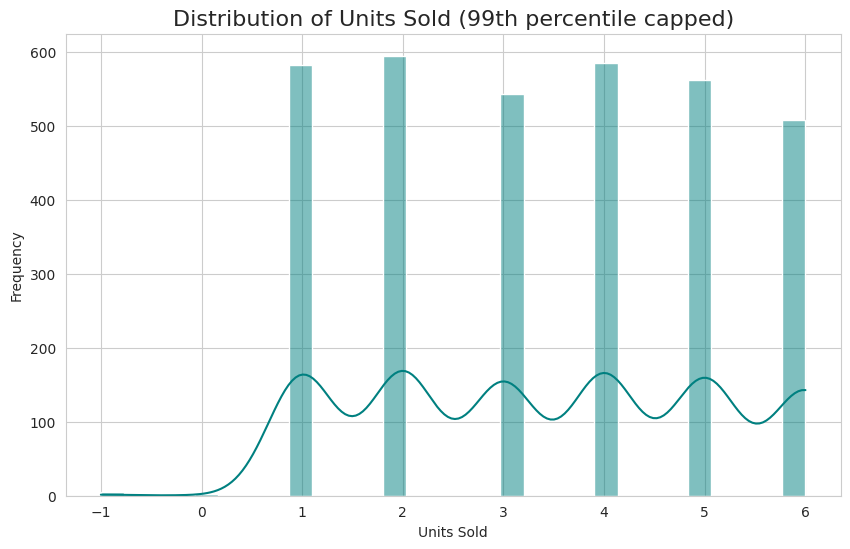

In [216]:


# 1. Distribution of Units Sold (capping outliers)
plt.figure(figsize=(10,6))
cap_units = df['UnitsSold'].quantile(0.99)
sns.histplot(df[df['UnitsSold'] <= cap_units]['UnitsSold'], bins=30, kde=True, color='teal')
plt.title('Distribution of Units Sold (99th percentile capped)', fontsize=16)
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Interpretation of your above chart

**Interpretation:**

- Feature used: "Brand" (car company names).
- This chart tells how many car models each brand has in the data.
- Brands with bigger bars have more car records.
- It shows which brands are popular or common.

**Why it matters:**

This helps understand which car brands are big players and which ones have less presence in the market.


/tmp/ipython-input-408930430.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=top_brands.values, y=top_brands.index, palette='viridis')


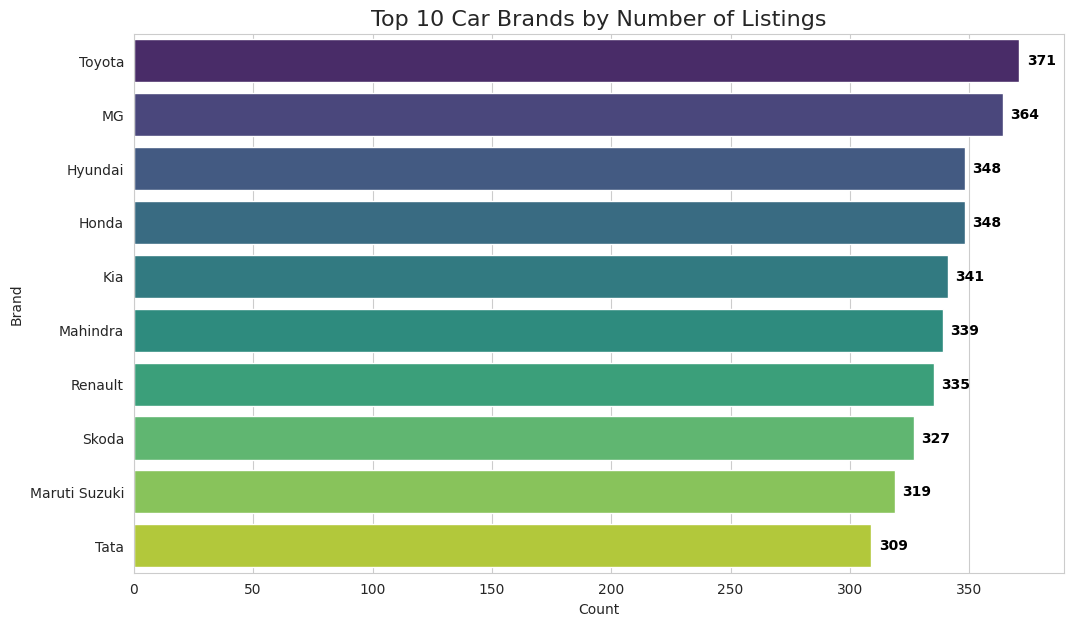

In [217]:
# 2. Top 10 Brands by number of listings (horizontal bar with annotation)
top_brands = df['Brand'].value_counts().nlargest(10)
plt.figure(figsize=(12,7))
barplot = sns.barplot(x=top_brands.values, y=top_brands.index, palette='viridis')
plt.title('Top 10 Car Brands by Number of Listings', fontsize=16)
plt.xlabel('Count')
plt.ylabel('Brand')
for i, v in enumerate(top_brands.values):
    barplot.text(v + 3, i, str(v), color='black', va='center', fontweight='bold')
plt.show()

**Interpretation:**

- Features used: "Price", "UnitsSold", and "FuelType" (kind of fuel used).
- This chart shows how car price affects how many cars are sold.
- Different colors show different fuel types like petrol, diesel, or electric.
- Clusters tell if cheaper cars sell more, or if some expensive cars also sell a lot.

**Why it matters:**

It helps decide the best prices for different fuel types to sell more cars and earn more money.


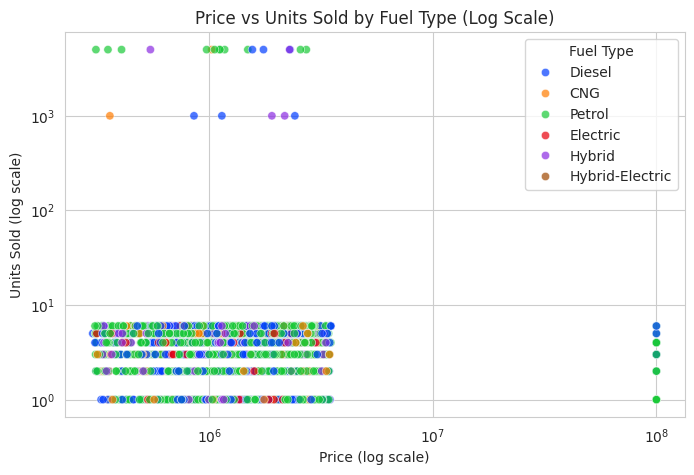

In [218]:
# 3. Price vs Units Sold by Fuel Type scatterplot (log scale)
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Price', y='UnitsSold', hue='FuelType', alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.title('Price vs Units Sold by Fuel Type (Log Scale)')
plt.xlabel('Price (log scale)')
plt.ylabel('Units Sold (log scale)')
plt.legend(title='Fuel Type')
plt.show()

**Interpretation:**

- Features used: Price, EngineCC (engine size), UnitsSold, Revenue.
- The heatmap shows how these features are related to each other.
- Dark colors and numbers close to 1 or -1 mean strong connections.
- For example, if price and revenue have a strong positive link, higher price means more money made.

**Why it matters:**

Knowing which features affect each other helps in planning business moves and making predictions.


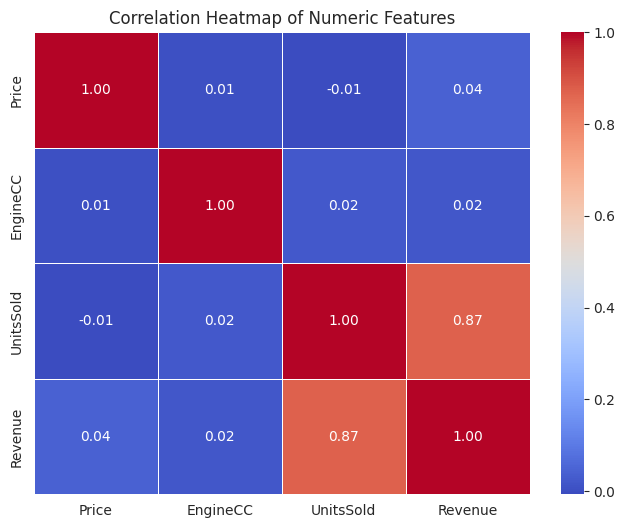

In [219]:
plt.figure(figsize=(8,6))
numeric_cols = ['Price', 'EngineCC', 'UnitsSold', 'Revenue']
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


**Interpretation:**

- Features used: Price, EngineCC (engine size), UnitsSold, Revenue.
- The heatmap shows how these features are related to each other.
- Dark colors and numbers close to 1 or -1 mean strong connections.
- For example, if price and revenue have a strong positive link, higher price means more money made.

**Why it matters:**

Knowing which features affect each other helps in planning business moves and making predictions.


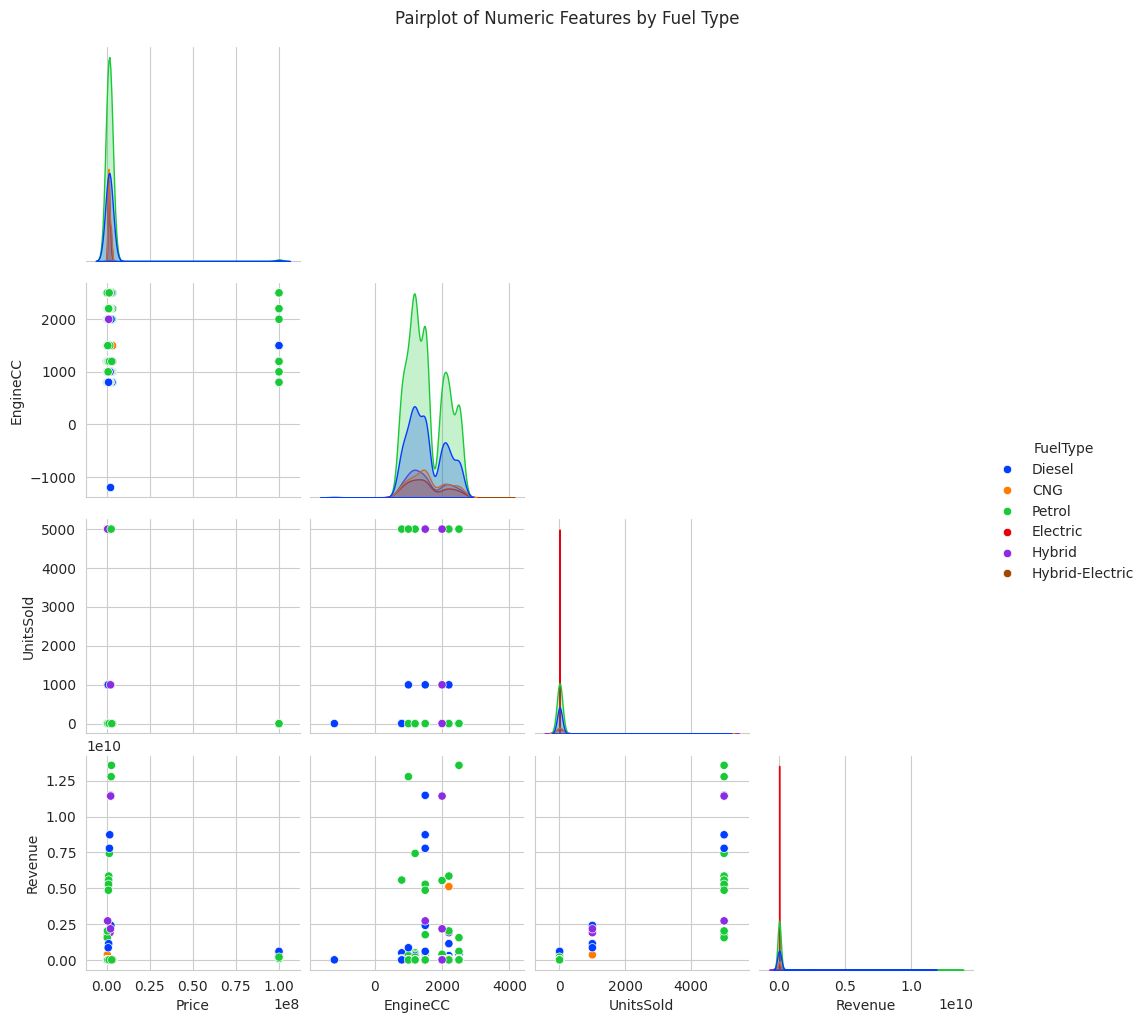

In [220]:
sns.pairplot(df[numeric_cols + ['FuelType']], hue='FuelType', diag_kind='kde', corner=True)
plt.suptitle('Pairplot of Numeric Features by Fuel Type', y=1.02)
plt.show()


**Interpretation:**

- Features used: Revenue, Brand, FuelType.
- This chart shows how much money each brand makes on average from each fuel type car.
- Darker colors mean more revenue.
- It compares brands side-by-side easily.

**Why it matters:**

This shows which brands and fuel types make the most money, helping to focus on successful markets.


Text(0.5, 58.7222222222222, 'Fuel')

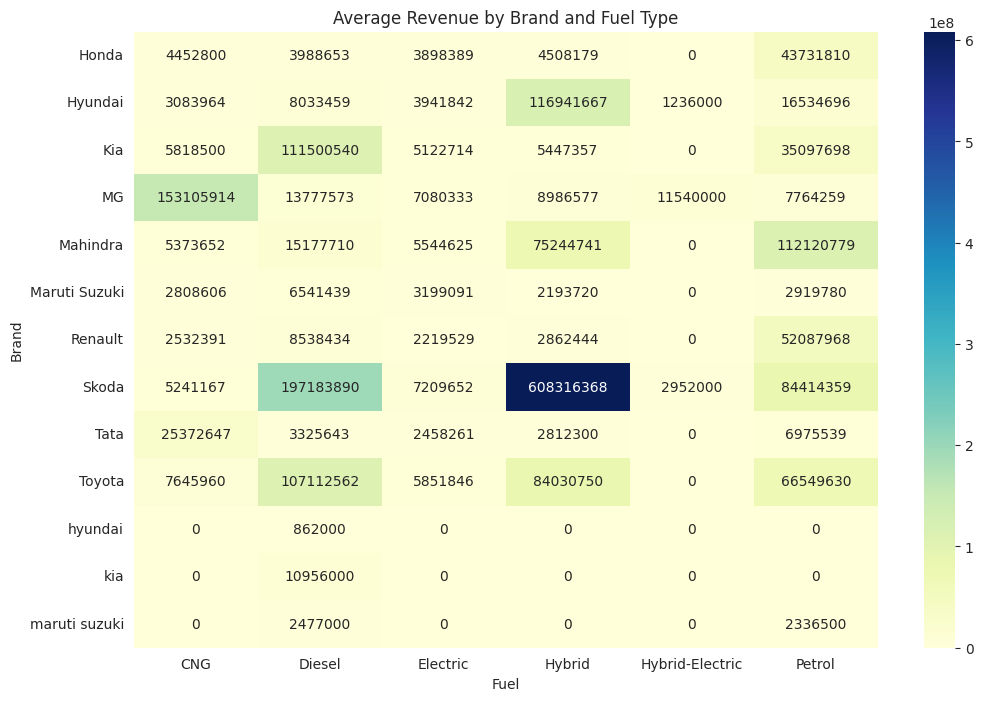

In [221]:
pivot_table = df.pivot_table(values='Revenue', index='Brand', columns='FuelType', aggfunc='mean', fill_value=0)
plt.figure(figsize=(12,8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Average Revenue by Brand and Fuel Type')
plt.xlabel('Fuel')



# Make extra visual with features for powerbi


### With good looking styles

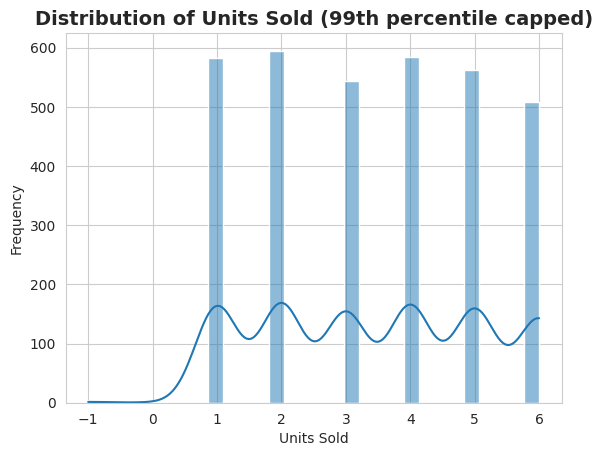

In [222]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette('bright')
sns.set_style("whitegrid")

cap_units = df['UnitsSold'].quantile(0.99)
sns.histplot(df[df['UnitsSold'] <= cap_units]['UnitsSold'], bins=30, kde=True, color='#1f77b4')
plt.title('Distribution of Units Sold (99th percentile capped)', fontsize=14, fontweight='bold')
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


/tmp/ipython-input-1654618819.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.values, y=top_brands.index, palette=palette)


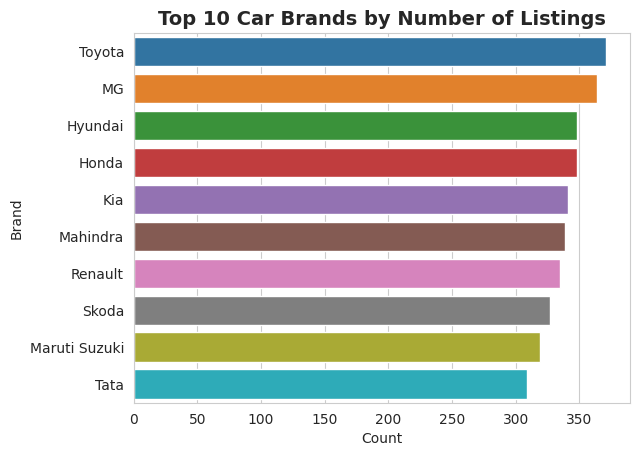

In [223]:
import matplotlib.pyplot as plt
import seaborn as sns

palette = sns.color_palette("tab10", 10)

top_brands = df['Brand'].value_counts().nlargest(10)
sns.barplot(x=top_brands.values, y=top_brands.index, palette=palette)
plt.title('Top 10 Car Brands by Number of Listings', fontsize=14, fontweight='bold')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.show()


/tmp/ipython-input-394062168.py:6: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.scatterplot(data=df, x='Price', y='UnitsSold', hue='FuelType', palette=palette, s=80, alpha=0.8, edgecolor='black')


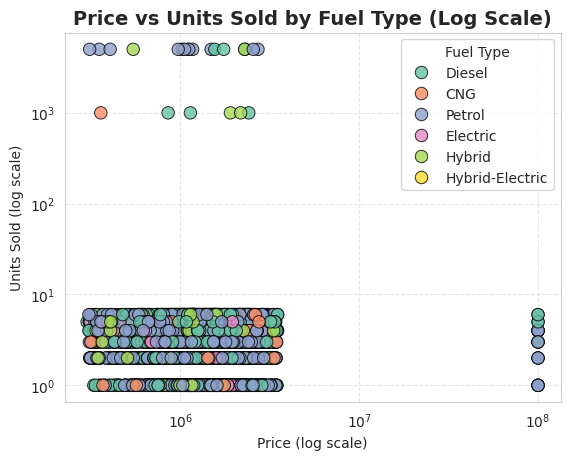

In [224]:
import matplotlib.pyplot as plt
import seaborn as sns

palette = sns.color_palette("Set2")

sns.scatterplot(data=df, x='Price', y='UnitsSold', hue='FuelType', palette=palette, s=80, alpha=0.8, edgecolor='black')
plt.xscale('log')
plt.yscale('log')
plt.title('Price vs Units Sold by Fuel Type (Log Scale)', fontsize=14, fontweight='bold')
plt.xlabel('Price (log scale)')
plt.ylabel('Units Sold (log scale)')
plt.legend(title='Fuel Type', loc='upper right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


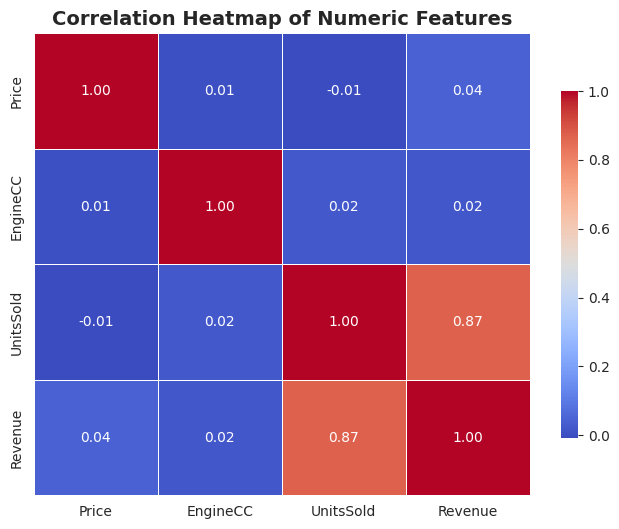

In [225]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
corr = df[['Price', 'EngineCC', 'UnitsSold', 'Revenue']].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.7, linecolor='white', cbar_kws={"shrink": 0.75})
plt.title('Correlation Heatmap of Numeric Features', fontsize=14, fontweight='bold')
plt.show()


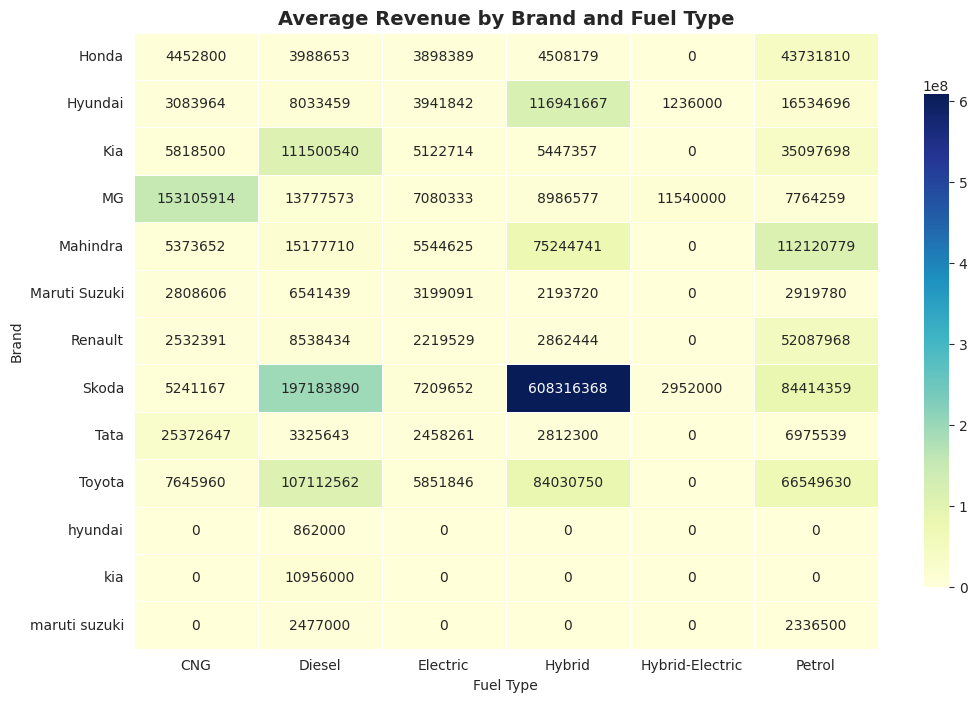

In [226]:
import matplotlib.pyplot as plt
import seaborn as sns

pivot_table = df.pivot_table(values='Revenue', index='Brand', columns='FuelType', aggfunc='mean', fill_value=0)
plt.figure(figsize=(12,8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='YlGnBu', linewidths=0.5, linecolor='white', cbar_kws={"shrink": 0.8})
plt.title('Average Revenue by Brand and Fuel Type', fontsize=14, fontweight='bold')
plt.xlabel('Fuel Type')
plt.ylabel('Brand')
plt.show()


/tmp/ipython-input-1375094510.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=transmission_sales.index, y=transmission_sales.values, palette=palette)
/tmp/ipython-input-1375094510.py:7: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.barplot(x=transmission_sales.index, y=transmission_sales.values, palette=palette)


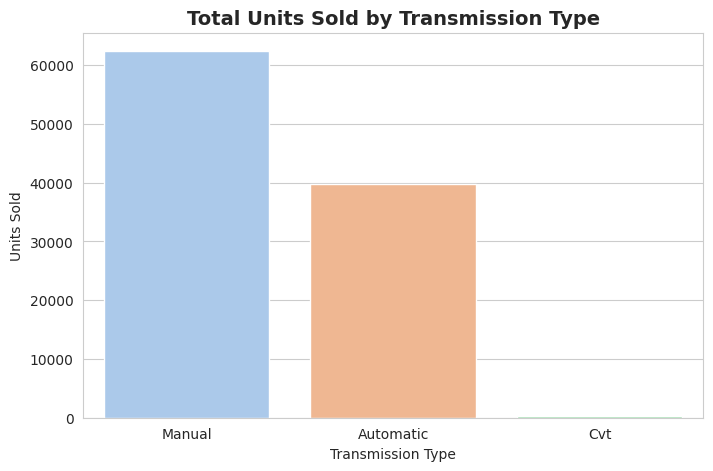

In [227]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
palette = sns.color_palette("pastel")
transmission_sales = df.groupby('Transmission')['UnitsSold'].sum().sort_values(ascending=False)
sns.barplot(x=transmission_sales.index, y=transmission_sales.values, palette=palette)
plt.title('Total Units Sold by Transmission Type', fontsize=14, fontweight='bold')
plt.xlabel('Transmission Type')
plt.ylabel('Units Sold')
plt.show()


/tmp/ipython-input-1596625773.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities_revenue.values, y=top_cities_revenue.index, palette=palette)


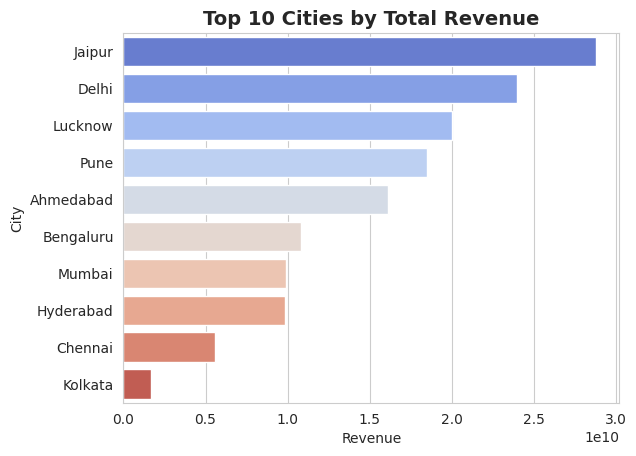

In [228]:
import matplotlib.pyplot as plt
import seaborn as sns

top_cities_revenue = df.groupby('City')['Revenue'].sum().nlargest(10)
palette = sns.color_palette("coolwarm", 10)
sns.barplot(x=top_cities_revenue.values, y=top_cities_revenue.index, palette=palette)
plt.title('Top 10 Cities by Total Revenue', fontsize=14, fontweight='bold')
plt.xlabel('Revenue')
plt.ylabel('City')
plt.show()


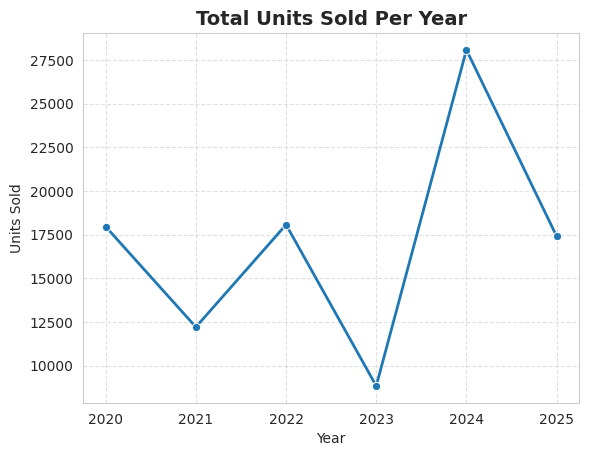

In [229]:
import matplotlib.pyplot as plt
import seaborn as sns

annual_sales = df.groupby('SaleYear')['UnitsSold'].sum()
sns.lineplot(x=annual_sales.index, y=annual_sales.values, marker='o', linewidth=2, color='#1f77b4')
plt.title('Total Units Sold Per Year', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Units Sold')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


/tmp/ipython-input-1003267424.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_enginecc_by_brand.values, y=avg_enginecc_by_brand.index, palette=palette)


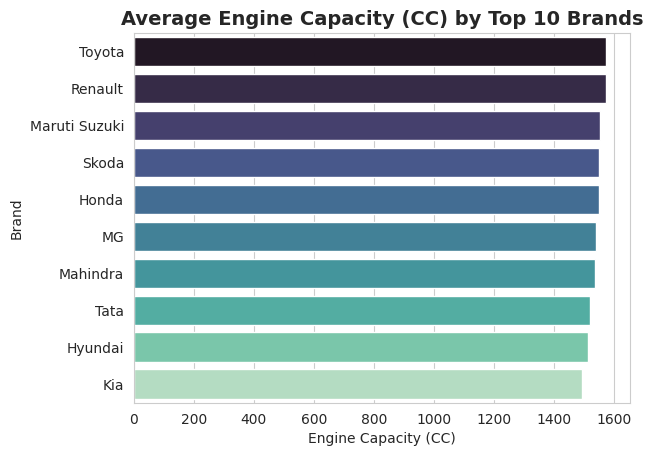

In [230]:
import matplotlib.pyplot as plt
import seaborn as sns

top_brands = df['Brand'].value_counts().nlargest(10).index
avg_enginecc_by_brand = df[df['Brand'].isin(top_brands)].groupby('Brand')['EngineCC'].mean().sort_values(ascending=False)
palette = sns.color_palette("mako", 10)
sns.barplot(x=avg_enginecc_by_brand.values, y=avg_enginecc_by_brand.index, palette=palette)
plt.title('Average Engine Capacity (CC) by Top 10 Brands', fontsize=14, fontweight='bold')
plt.xlabel('Engine Capacity (CC)')
plt.ylabel('Brand')
plt.show()


In [231]:
print(df.head(1))

      SaleID   SaleDate          Brand   Model   Price  EngineCC FuelType  \
0  SAL103626 2022-02-16  Maruti Suzuki  Ertiga 301,000     1,198   Diesel   

  Transmission BuyerGender       City  UnitsSold   Revenue  SaleYear  
0    Automatic        Male  Ahmedabad          5 1,505,000      2022  


## Stage 4 – Documentation, Insights and Presentation



Documentation Link - https://drive.google.com/file/d/1LCGjRYcZAlnvo9FnC22kaiD0dpZICjv6/view?usp=sharing


# Future Enhancement

Utilize a larger or more up-to-date dataset to uncover deeper and more comprehensive market insights.

Automate analysis workflows using scripts or dashboard tools to streamline data processing and reporting.

Incorporate advanced and interactive visualizations using platforms like Power BI or Tableau to enhance decision-making.

Extend the project by integrating predictive modeling techniques for forecasting future sales trends and market dynamics.

# Conclusion

From the comprehensive analysis of the Indian automotive sales data from 2020 to 2025, this project identified significant patterns and relationships among brands, fuel types, transmission preferences, and regional sales. The visualizations clearly highlight key market leaders, buyer demographics, and revenue hotspots, providing valuable insights that can inform strategic decisions for manufacturers and dealers. These findings form a solid data-driven foundation for optimizing inventory, targeting marketing efforts, and better understanding emerging trends in the evolving Indian automotive market.